In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#!pip install scikit-learn

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
##from sklearn.model_selection import RepeatedKfold, ShuffleSplit

In [4]:
df_label = pd.read_csv('Label.csv',header='infer')

In [5]:
df_label.head()

,MDM,Label
0,219,1
1,265,1
2,477,1
3,573,1
4,785,1


In [6]:
df_1 = pd.read_csv('BC_FY23_P1.csv',header='infer')
df_2 = pd.read_csv('BC_FY23_P2.csv',header='infer')
df_3 = pd.read_csv('BC_FY23_P3.csv',header='infer')
df_4 = pd.read_csv('BC_FY23_P4.csv',header='infer')
df_5 = pd.read_csv('BC_FY23_P5.csv',header='infer')
df_6 = pd.read_csv('BC_FY23_P6.csv',header='infer')

In [7]:
df_list = [df_1,df_2,df_3,df_4,df_5,df_6]
append_df = pd.concat(df_list, ignore_index=True)

In [8]:
append_df.shape

(5155135, 42)

In [9]:
append_df.dtypes

Date                 int64
Week                 int64
DayWeek              int64
FiscalYear           int64
FiscalPeriod         int64
FiscalWeek           int64
Player               int64
Jurisdiction        object
CasinoID             int64
StartDate            int64
SessionTimeHr      float64
DepositAmt         float64
WithdrawalAmt      float64
ProductCount         int64
S_ProductC           int64
P_ProductC           int64
L_ProductC           int64
T_ProductC           int64
NewProductCount      int64
S_NewProductC        int64
P_NewProductC        int64
L_NewProductC        int64
T_NewProductC        int64
NetWin             float64
NewNetWin          float64
S_NetWin           float64
P_NetWin           float64
L_NetWin           float64
T_NetWin           float64
PaidAmt            float64
NewPaidAmt         float64
S_PaidAmt          float64
P_PaidAmt          float64
L_PaidAmt          float64
T_PaidAmt          float64
PromoAmt           float64
S_PromoAmt         float64
P

In [10]:
append_df.head()

,Date,Week,DayWeek,FiscalYear,FiscalPeriod,FiscalWeek,Player,Jurisdiction,CasinoID,StartDate,...,P_PaidAmt,L_PaidAmt,T_PaidAmt,PromoAmt,S_PromoAmt,P_PromoAmt,L_PromoAmt,T_PromoAmt,Encore,CRM
0,20220826,35,6,2023,6,22,101,British Columbia,1,20050402,...,NaN,1248.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN
1,20220827,35,7,2023,6,22,101,British Columbia,1,20050402,...,NaN,2657.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN
2,20220828,36,1,2023,6,23,101,British Columbia,1,20050402,...,NaN,2420.5,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN
3,20220830,36,3,2023,6,23,101,British Columbia,1,20050402,...,NaN,581.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN
4,20220831,36,4,2023,6,23,101,British Columbia,1,20050402,...,NaN,258.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN


In [11]:
append_df.columns

Index(['Date', 'Week', 'DayWeek', 'FiscalYear', 'FiscalPeriod', 'FiscalWeek',
       'Player', 'Jurisdiction', 'CasinoID', 'StartDate', 'SessionTimeHr',
       'DepositAmt', 'WithdrawalAmt', 'ProductCount', 'S_ProductC',
       'P_ProductC', 'L_ProductC', 'T_ProductC', 'NewProductCount',
       'S_NewProductC', 'P_NewProductC', 'L_NewProductC', 'T_NewProductC',
       'NetWin', 'NewNetWin', 'S_NetWin', 'P_NetWin', 'L_NetWin', 'T_NetWin',
       'PaidAmt', 'NewPaidAmt', 'S_PaidAmt', 'P_PaidAmt', 'L_PaidAmt',
       'T_PaidAmt', 'PromoAmt', 'S_PromoAmt', 'P_PromoAmt', 'L_PromoAmt',
       'T_PromoAmt', 'Encore', 'CRM'],
      dtype='object')

In [12]:
append_df.drop(['Date', 'FiscalYear', 'Jurisdiction'], axis=1, inplace=True)

In [13]:
##append_df.columns

In [14]:
append_df.drop(['Week', 'DayWeek', 'FiscalPeriod','FiscalWeek','StartDate'], axis=1, inplace=True)

In [15]:
##append_df.columns

In [16]:
append_df.drop(['L_ProductC', 'T_ProductC','L_NewProductC','T_NewProductC',
                'L_NetWin', 'T_NetWin',
               'L_PaidAmt', 'T_PaidAmt',
                'L_PromoAmt', 'T_PromoAmt'
               ], axis=1, inplace=True)

In [17]:
append_df.columns

Index(['Player', 'CasinoID', 'SessionTimeHr', 'DepositAmt', 'WithdrawalAmt',
       'ProductCount', 'S_ProductC', 'P_ProductC', 'NewProductCount',
       'S_NewProductC', 'P_NewProductC', 'NetWin', 'NewNetWin', 'S_NetWin',
       'P_NetWin', 'PaidAmt', 'NewPaidAmt', 'S_PaidAmt', 'P_PaidAmt',
       'PromoAmt', 'S_PromoAmt', 'P_PromoAmt', 'Encore', 'CRM'],
      dtype='object')

In [18]:
from scipy import stats

In [19]:
append_df.fillna(0, inplace=True)

In [20]:
append_df.isna().any()

Player             False
CasinoID           False
SessionTimeHr      False
DepositAmt         False
WithdrawalAmt      False
ProductCount       False
S_ProductC         False
P_ProductC         False
NewProductCount    False
S_NewProductC      False
P_NewProductC      False
NetWin             False
NewNetWin          False
S_NetWin           False
P_NetWin           False
PaidAmt            False
NewPaidAmt         False
S_PaidAmt          False
P_PaidAmt          False
PromoAmt           False
S_PromoAmt         False
P_PromoAmt         False
Encore             False
CRM                False
dtype: bool

In [21]:
append_df.shape

(5155135, 24)

In [22]:
aggregation_functions = {
    'CasinoID': 'mean',
    'SessionTimeHr': 'sum',
    'DepositAmt': 'sum',
    'WithdrawalAmt': 'sum',
    'ProductCount': 'mean',
    'S_ProductC': 'mean',
    'P_ProductC': 'mean',
    'NewProductCount': 'mean',
    'S_NewProductC': 'mean',
    'P_NewProductC': 'mean',
    'NetWin': 'sum',
    'NewNetWin': 'sum',
    'S_NetWin': 'sum',
    'P_NetWin': 'sum',
    'PaidAmt': 'sum',
    'NewPaidAmt': 'sum',
    'S_PaidAmt': 'sum',
    'P_PaidAmt': 'sum',
    'PromoAmt': 'sum',
    'S_PromoAmt': 'sum',
    'P_PromoAmt': 'sum',
    'Encore': 'sum',
    'CRM': 'sum'
}


In [23]:
aggregated_df = append_df.groupby('Player').agg(aggregation_functions).reset_index()

In [24]:
aggregated_df.head()

,Player,CasinoID,SessionTimeHr,DepositAmt,WithdrawalAmt,ProductCount,S_ProductC,P_ProductC,NewProductCount,S_NewProductC,...,P_NetWin,PaidAmt,NewPaidAmt,S_PaidAmt,P_PaidAmt,PromoAmt,S_PromoAmt,P_PromoAmt,Encore,CRM
0,101,1.0,22.0,800.0,-1100.00,1.250000,0.000000,0.000000,0.000000,0.000000,...,0.00,23996.50,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
1,103,0.0,2.0,500.0,-560.00,8.500000,7.500000,0.500000,0.000000,0.000000,...,-26.00,2315.56,0.00,2266.56,18.00,0.0,0.0,0.0,0.0,0.0
2,105,0.0,5.0,400.0,0.00,4.800000,4.600000,0.200000,0.200000,0.200000,...,2.50,2152.51,5.94,2147.51,5.00,0.0,0.0,0.0,0.0,0.0
3,133,1.0,79.0,25505.0,-6156.58,2.985294,2.779412,0.205882,0.941176,0.750000,...,614.05,246962.25,69425.43,244932.85,2029.40,1417.0,1389.0,28.0,1417.0,0.0
4,183,1.0,791.0,100600.0,-60325.00,6.295918,5.380952,0.908163,2.214286,1.782313,...,6923.40,1234985.94,450718.89,1148137.65,86706.79,4927.0,4048.8,878.2,4927.0,0.0


In [25]:
aggregated_df['CasinoID'] = aggregated_df['CasinoID'].astype('category')

In [26]:
aggregated_df.dtypes

Player                int64
CasinoID           category
SessionTimeHr       float64
DepositAmt          float64
WithdrawalAmt       float64
ProductCount        float64
S_ProductC          float64
P_ProductC          float64
NewProductCount     float64
S_NewProductC       float64
P_NewProductC       float64
NetWin              float64
NewNetWin           float64
S_NetWin            float64
P_NetWin            float64
PaidAmt             float64
NewPaidAmt          float64
S_PaidAmt           float64
P_PaidAmt           float64
PromoAmt            float64
S_PromoAmt          float64
P_PromoAmt          float64
Encore              float64
CRM                 float64
dtype: object

In [27]:
df_label.columns

Index(['MDM', 'Label'], dtype='object')

In [28]:
df_label.dtypes

MDM      int64
Label    int64
dtype: object

In [29]:
mdm_set = set(df_label['MDM'])

aggregated_df['target'] = np.where(aggregated_df['Player'].isin(mdm_set), 1, 0)

In [30]:
aggregated_df['target'].value_counts()

target
0    89420
1    31372
Name: count, dtype: int64

In [31]:
aggregated_df['target'] = aggregated_df['target'].astype('category')

# Train/Test Split

In [32]:
X = aggregated_df.drop(columns=['target'])  
y = aggregated_df['target']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

## Decision Tree

In [34]:
clf = DecisionTreeClassifier(
    random_state=42,criterion='entropy',
    min_samples_split= 150, min_samples_leaf=200, max_depth=10, max_leaf_nodes=10
)


clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=10,
                       min_samples_leaf=200, min_samples_split=150,
                       random_state=42)

In [35]:
y_pred_dt = clf.predict(X_test)

In [36]:
class_names = aggregated_df['target'].unique()
class_names = [str(class_name) for class_name in class_names]

In [37]:
print(classification_report(y_test,y_pred_dt,target_names=class_names))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87     17925
           1       0.65      0.48      0.55      6234

    accuracy                           0.80     24159
   macro avg       0.74      0.69      0.71     24159
weighted avg       0.79      0.80      0.79     24159



In [38]:
from sklearn import tree

[Text(0.5333333333333333, 0.9, 'x[3] <= 100.5\nentropy = 0.827\nsamples = 96633\nvalue = [71495, 25138]'),
 Text(0.26666666666666666, 0.7, 'x[6] <= 0.037\nentropy = 0.99\nsamples = 40087\nvalue = [22400, 17687]'),
 Text(0.13333333333333333, 0.5, 'x[7] <= 0.003\nentropy = 0.733\nsamples = 12508\nvalue = [9935, 2573]'),
 Text(0.06666666666666667, 0.3, 'entropy = 0.006\nsamples = 8296\nvalue = [8292, 4]'),
 Text(0.2, 0.3, 'entropy = 0.965\nsamples = 4212\nvalue = [1643, 2569]'),
 Text(0.4, 0.5, 'x[2] <= 0.5\nentropy = 0.993\nsamples = 27579\nvalue = [12465, 15114]'),
 Text(0.3333333333333333, 0.3, 'x[19] <= 0.25\nentropy = 0.931\nsamples = 13889\nvalue = [4815, 9074]'),
 Text(0.26666666666666666, 0.1, 'entropy = 0.815\nsamples = 8415\nvalue = [2123, 6292]'),
 Text(0.4, 0.1, 'entropy = 1.0\nsamples = 5474\nvalue = [2692, 2782]'),
 Text(0.4666666666666667, 0.3, 'entropy = 0.99\nsamples = 13690\nvalue = [7650, 6040]'),
 Text(0.8, 0.7, 'x[20] <= 51.15\nentropy = 0.562\nsamples = 56546\nvalue 

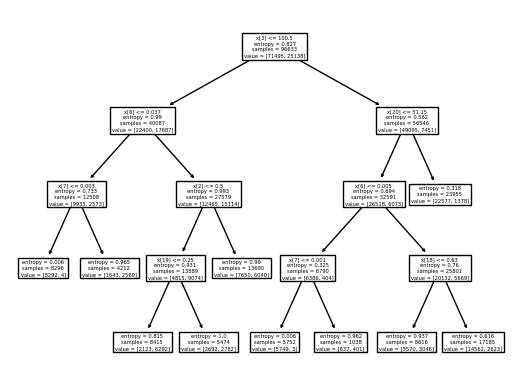

In [39]:
tree.plot_tree(clf)

In [40]:
feature_names = ['CasinoID', 'SessionTimeHr', 'DepositAmt', 'WithdrawalAmt',
       'ProductCount', 'S_ProductC', 'P_ProductC', 'NewProductCount',
       'S_NewProductC', 'P_NewProductC', 'NetWin', 'NewNetWin', 'S_NetWin',
       'P_NetWin', 'PaidAmt', 'NewPaidAmt', 'S_PaidAmt', 'P_PaidAmt',
       'PromoAmt', 'S_PromoAmt', 'P_PromoAmt', 'Encore', 'CRM']

[Text(0.5333333333333333, 0.9, 'WithdrawalAmt <= 100.5\nentropy = 0.827\nsamples = 96633\nvalue = [71495, 25138]\nclass = 0'),
 Text(0.26666666666666666, 0.7, 'P_ProductC <= 0.037\nentropy = 0.99\nsamples = 40087\nvalue = [22400, 17687]\nclass = 0'),
 Text(0.13333333333333333, 0.5, 'NewProductCount <= 0.003\nentropy = 0.733\nsamples = 12508\nvalue = [9935, 2573]\nclass = 0'),
 Text(0.06666666666666667, 0.3, 'entropy = 0.006\nsamples = 8296\nvalue = [8292, 4]\nclass = 0'),
 Text(0.2, 0.3, 'entropy = 0.965\nsamples = 4212\nvalue = [1643, 2569]\nclass = 1'),
 Text(0.4, 0.5, 'DepositAmt <= 0.5\nentropy = 0.993\nsamples = 27579\nvalue = [12465, 15114]\nclass = 1'),
 Text(0.3333333333333333, 0.3, 'S_PromoAmt <= 0.25\nentropy = 0.931\nsamples = 13889\nvalue = [4815, 9074]\nclass = 1'),
 Text(0.26666666666666666, 0.1, 'entropy = 0.815\nsamples = 8415\nvalue = [2123, 6292]\nclass = 1'),
 Text(0.4, 0.1, 'entropy = 1.0\nsamples = 5474\nvalue = [2692, 2782]\nclass = 1'),
 Text(0.4666666666666667, 

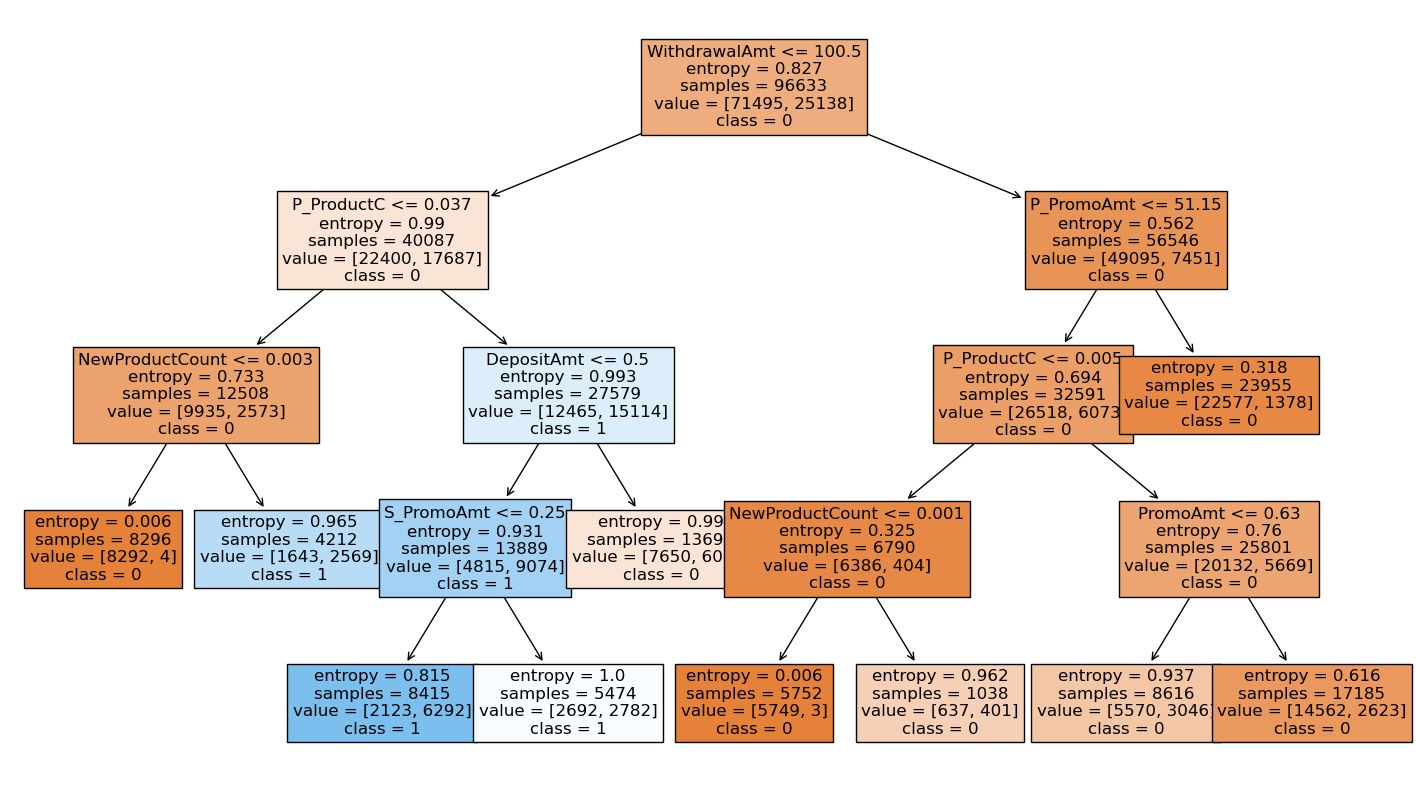

In [41]:
plt.figure(figsize=(18,10));
tree.plot_tree(clf, filled=True, feature_names=feature_names, class_names=class_names, proportion=False, fontsize=12)

In [42]:
importances = clf.feature_importances_
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance')


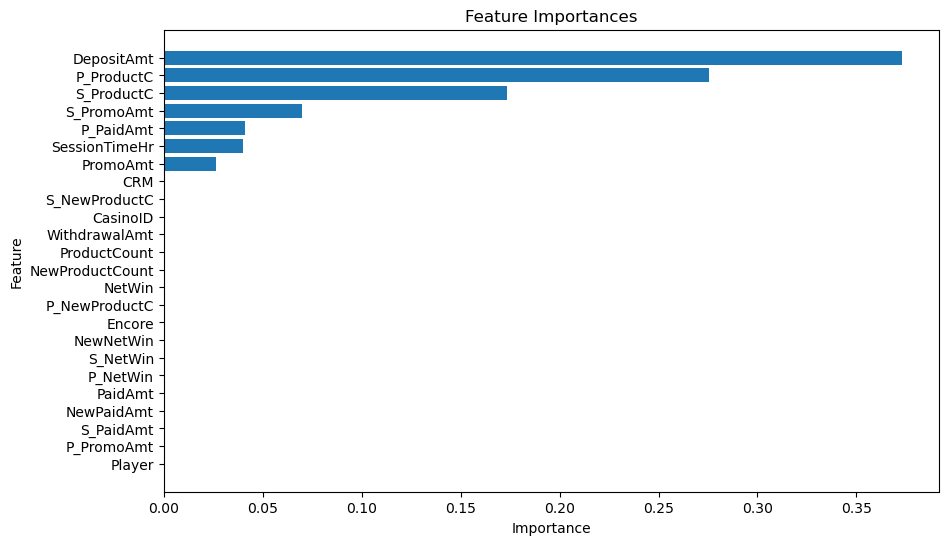

In [43]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


In [44]:
clf_gridsearch = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['entropy'],
    'min_samples_split': [100, 150, 200],
    'min_samples_leaf': [100, 150, 200],
    'max_depth': [5, 10, 15],
    'max_leaf_nodes': [5, 10, 15]
}
grid_search = GridSearchCV(estimator=clf_gridsearch, param_grid=param_grid, cv=10, scoring='f1')

In [45]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['entropy'], 'max_depth': [5, 10, 15],
                         'max_leaf_nodes': [5, 10, 15],
                         'min_samples_leaf': [100, 150, 200],
                         'min_samples_split': [100, 150, 200]},
             scoring='f1')

In [46]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters found: ", best_params)
print("Best model: ", best_model)


Best parameters found:  {'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 5, 'min_samples_leaf': 100, 'min_samples_split': 100}
Best model:  DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=5,
                       min_samples_leaf=100, min_samples_split=100,
                       random_state=42)


In [47]:
y_pred_gridsearch = best_model.predict(X_test)

In [48]:
print(classification_report(y_test,y_pred_gridsearch,target_names=class_names))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84     17925
           1       0.56      0.72      0.63      6234

    accuracy                           0.78     24159
   macro avg       0.72      0.76      0.74     24159
weighted avg       0.81      0.78      0.79     24159



[Text(0.5555555555555556, 0.875, 'x[3] <= 100.5\nentropy = 0.827\nsamples = 96633\nvalue = [71495, 25138]'),
 Text(0.3333333333333333, 0.625, 'x[6] <= 0.037\nentropy = 0.99\nsamples = 40087\nvalue = [22400, 17687]'),
 Text(0.2222222222222222, 0.375, 'x[7] <= 0.003\nentropy = 0.733\nsamples = 12508\nvalue = [9935, 2573]'),
 Text(0.1111111111111111, 0.125, 'entropy = 0.006\nsamples = 8296\nvalue = [8292, 4]'),
 Text(0.3333333333333333, 0.125, 'entropy = 0.965\nsamples = 4212\nvalue = [1643, 2569]'),
 Text(0.4444444444444444, 0.375, 'entropy = 0.993\nsamples = 27579\nvalue = [12465, 15114]'),
 Text(0.7777777777777778, 0.625, 'x[20] <= 51.15\nentropy = 0.562\nsamples = 56546\nvalue = [49095, 7451]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.694\nsamples = 32591\nvalue = [26518, 6073]'),
 Text(0.8888888888888888, 0.375, 'entropy = 0.318\nsamples = 23955\nvalue = [22577, 1378]')]

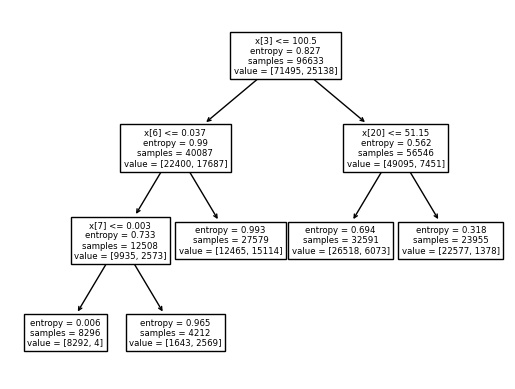

In [49]:
tree.plot_tree(best_model)

[Text(0.5555555555555556, 0.875, 'WithdrawalAmt <= 100.5\nentropy = 0.827\nsamples = 96633\nvalue = [71495, 25138]\nclass = 0'),
 Text(0.3333333333333333, 0.625, 'P_ProductC <= 0.037\nentropy = 0.99\nsamples = 40087\nvalue = [22400, 17687]\nclass = 0'),
 Text(0.2222222222222222, 0.375, 'NewProductCount <= 0.003\nentropy = 0.733\nsamples = 12508\nvalue = [9935, 2573]\nclass = 0'),
 Text(0.1111111111111111, 0.125, 'entropy = 0.006\nsamples = 8296\nvalue = [8292, 4]\nclass = 0'),
 Text(0.3333333333333333, 0.125, 'entropy = 0.965\nsamples = 4212\nvalue = [1643, 2569]\nclass = 1'),
 Text(0.4444444444444444, 0.375, 'entropy = 0.993\nsamples = 27579\nvalue = [12465, 15114]\nclass = 1'),
 Text(0.7777777777777778, 0.625, 'P_PromoAmt <= 51.15\nentropy = 0.562\nsamples = 56546\nvalue = [49095, 7451]\nclass = 0'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.694\nsamples = 32591\nvalue = [26518, 6073]\nclass = 0'),
 Text(0.8888888888888888, 0.375, 'entropy = 0.318\nsamples = 23955\nvalue = [22577

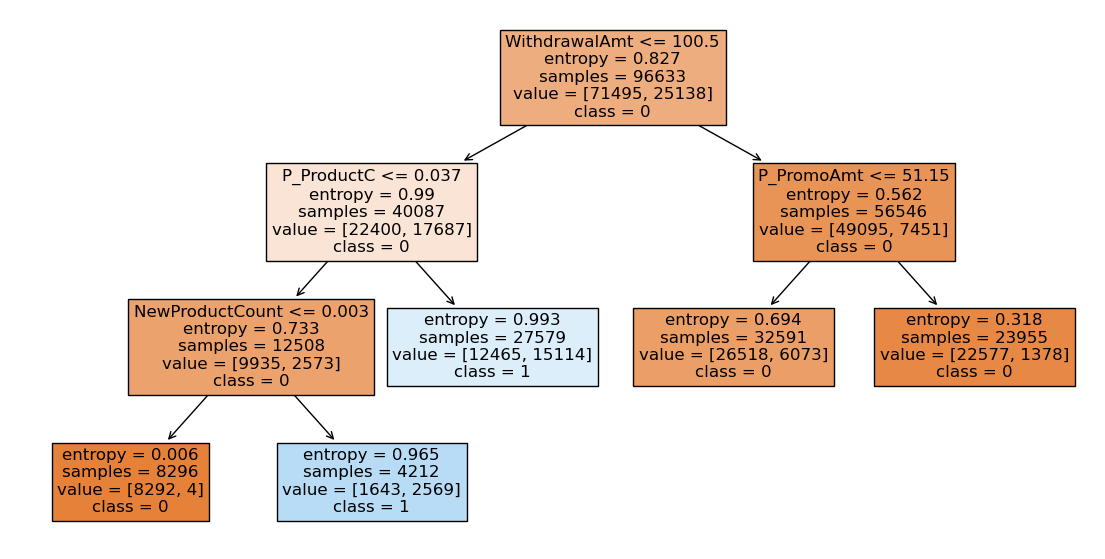

In [53]:
plt.figure(figsize=(14,7));
tree.plot_tree(best_model, filled=True, feature_names=feature_names, class_names=class_names, proportion=False, fontsize=12)